In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import  metrics   #Additional scklearn functions
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df_train = train.drop(columns='SalePrice') 
df_test = test

In [4]:
df_train.loc[df_train['GarageYrBlt'].isnull(),'GarageYrBlt'] = df_train['YearBuilt']
df_test.loc[df_test['GarageYrBlt'].isnull(),'GarageYrBlt'] = df_test['YearBuilt']

In [5]:
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

In [6]:
cat_columns = df_train.select_dtypes(['object']).columns

In [7]:
train_encoded = pd.get_dummies(df_train)
test_encoded = pd.get_dummies(df_test)
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1)

In [8]:
np.any(np.isnan(test_encoded))

True

In [9]:
np.any(np.isnan(train_encoded))

False

In [10]:
np.all(np.isfinite(test_encoded))

False

In [11]:
np.all(np.isfinite(train_encoded))

True

In [12]:
test_encoded.fillna(0, inplace=True)


In [13]:
np.any(np.isnan(test_encoded))

False

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Regression algorithms compared

## 1.1 GradientBoostingRegressor

In [16]:
X = train_encoded.drop(columns='Id')
y = train['SalePrice']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [18]:
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [19]:
y_pred = reg.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred) 
rmse = sqrt(mse) 
print(rmse)

26604.218872426613


# Tuning parameters

## learning rate

In [19]:
learning_rates =[1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []

for eta in learning_rates:
    model = ensemble.GradientBoostingRegressor(learning_rate=eta)    
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train) 
    r2score = r2_score(y_train, train_pred)
    train_results.append(r2score) 

    y_pred = model.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    test_results.append(r2score) 


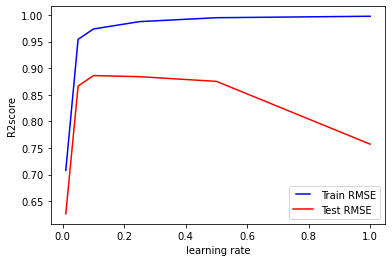

In [20]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train RMSE')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test RMSE')
 
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2score')
plt.xlabel('learning rate')
plt.show()

## n_estimators

In [21]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 300, 500, 700, 1000]
train_results = []
test_results = []

for estimator in n_estimators:
    model = ensemble.GradientBoostingRegressor(n_estimators=estimator)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)  
    r2score = r2_score(y_train, train_pred)
    train_results.append(r2score) 

    y_pred = model.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    test_results.append(r2score) 


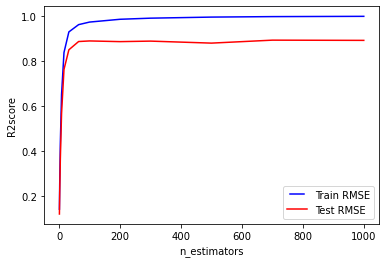

In [22]:
line1, = plt.plot(n_estimators, train_results, 'b', label='Train RMSE')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test RMSE')
                   
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2score')
plt.xlabel('n_estimators')
plt.show()

## max_depth

In [23]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    model = ensemble.GradientBoostingRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)  
    r2score = r2_score(y_train, train_pred)
    train_results.append(r2score) 

    y_pred = model.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    test_results.append(r2score)

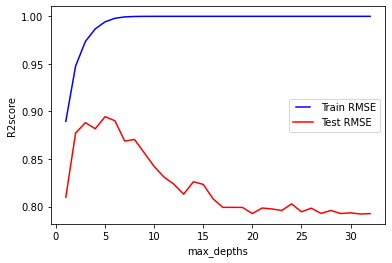

In [24]:
line1, = plt.plot(max_depths, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_depths, test_results, 'r', label='Test RMSE')
                   
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2score')
plt.xlabel('max_depths')
plt.show()

## min_samples_split

In [25]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    model = ensemble.GradientBoostingRegressor(min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)  
    r2score = r2_score(y_train, train_pred)
    train_results.append(r2score) 

    y_pred = model.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    test_results.append(r2score)

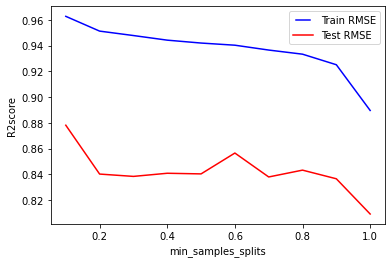

In [26]:
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test RMSE')
                   
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2score')
plt.xlabel('min_samples_splits')
plt.show()

## min_samples_leaf

In [27]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    model = ensemble.GradientBoostingRegressor(min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)  
    r2score = r2_score(y_train, train_pred)
    train_results.append(r2score) 

    y_pred = model.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    test_results.append(r2score)

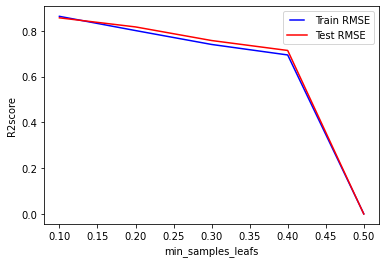

In [28]:
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test RMSE')
                   
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2score')
plt.xlabel('min_samples_leafs')
plt.show()

## max_features

In [29]:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    model = ensemble.GradientBoostingRegressor(max_features=max_feature)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)  
    r2score = r2_score(y_train, train_pred)
    train_results.append(r2score)

    y_pred = model.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    test_results.append(r2score)


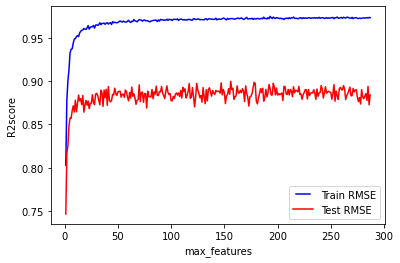

In [30]:
line1, = plt.plot(max_features, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_features, test_results, 'r', label='Test RMSE')
                   
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2score')
plt.xlabel('max_features')
plt.show()

## GradientBoostingRegressor with chosen parameters

In [21]:
params = {
    "learning_rate": 0.01,
    "n_estimators": 1000,
    "max_depth": 5,
    "min_samples_split": 0.01,
    "min_samples_leaf": 0.01,
    "max_features": 175,    

}


In [22]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

y_pred =reg.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred),2)
rmse = round(sqrt(mse),2)
r2score = round(r2_score(y_test, y_pred),2)

print("RMSE: " + str(rmse))
print("R2score: " + str(r2score))

RMSE: 26237.51
R2score: 0.89


In [23]:
predictions = reg.predict(test_encoded.drop(columns='Id'))

In [24]:
output = pd.DataFrame({'Id': test_encoded.Id, 'SalePrice': predictions})
output.to_csv('submission.csv', index=False)

## Random Hyperparameter Grid

In [19]:
from sklearn.model_selection import RandomizedSearchCV

learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rates,
               }

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01]}


In [20]:
reg = ensemble.GradientBoostingRegressor()

reg_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
reg_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [21]:
reg_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80,
 'learning_rate': 0.01}

### Evaluation

In [22]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = ensemble.GradientBoostingRegressor()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 17510.3358 degrees.
Accuracy = 89.72%.


In [23]:
best_random = reg_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 16337.7763 degrees.
Accuracy = 90.27%.


In [24]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.61%.


### Cross Validation

In [33]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 

param_grid = {
    
    'max_depth': [70,80,90],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [9, 10, 11],
    'n_estimators': [300, 500, 1000, 2000],
    'learning_rate': [0.01],
}

reg = ensemble.GradientBoostingRegressor()

grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [34]:
grid_search.fit(X_train, y_train)
grid_search.best_params_    
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Model Performance
Average Error: 16406.1567 degrees.
Accuracy = 90.27%.
Improvement of 0.61%.


In [35]:
grid_search.best_params_  

{'learning_rate': 0.01,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 11,
 'n_estimators': 2000}

## 1.2 Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

mse = round(mean_squared_error(y_test, rfc_pred),2)
rmse = round(sqrt(mse),2)
r2score = round(r2_score(y_test, rfc_pred),2)

print("RMSE: " + str(rmse))
print("R2score: " + str(r2score))

RMSE: 29035.44
R2score: 0.87


# Tuning parameters

## n_estimators

In [36]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 300, 500, 700, 1000]
train_results = []
test_results = []

for estimator in n_estimators:
    model = RandomForestRegressor(n_estimators=estimator)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)  
    r2score = r2_score(y_train, train_pred)
    train_results.append(r2score) 

    y_pred = model.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    test_results.append(r2score) 

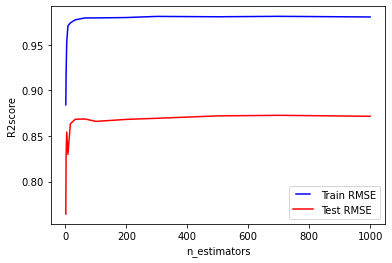

In [37]:
line1, = plt.plot(n_estimators, train_results, 'b', label='Train RMSE')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test RMSE')
                   
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2score')
plt.xlabel('n_estimators')
plt.show()

## max_depth

In [38]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    model = RandomForestRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)  
    r2score = r2_score(y_train, train_pred)
    train_results.append(r2score) 

    y_pred = model.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    test_results.append(r2score)

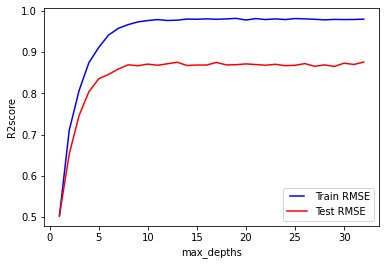

In [39]:
line1, = plt.plot(max_depths, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_depths, test_results, 'r', label='Test RMSE')
                   
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2score')
plt.xlabel('max_depths')
plt.show()

## min_samples_split

In [40]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    model = RandomForestRegressor(min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)  
    r2score = r2_score(y_train, train_pred)
    train_results.append(r2score) 

    y_pred = model.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    test_results.append(r2score)

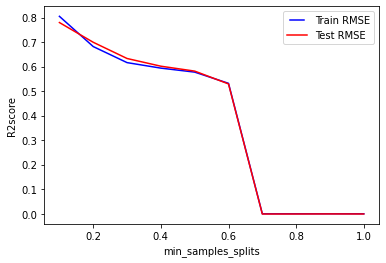

In [41]:
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test RMSE')
                   
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2score')
plt.xlabel('min_samples_splits')
plt.show()

## min_samples_leaf

In [42]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    model = RandomForestRegressor(min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)  
    r2score = r2_score(y_train, train_pred)
    train_results.append(r2score) 

    y_pred = model.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    test_results.append(r2score)

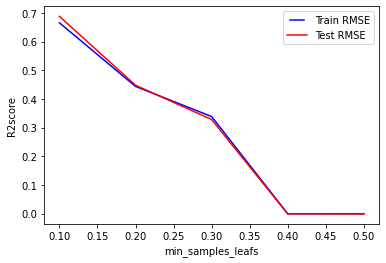

In [43]:
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test RMSE')
                   
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2score')
plt.xlabel('min_samples_leafs')
plt.show()

## max_features

In [44]:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    model = RandomForestRegressor(max_features=max_feature)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)  
    r2score = r2_score(y_train, train_pred)
    train_results.append(r2score)

    y_pred = model.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    test_results.append(r2score)


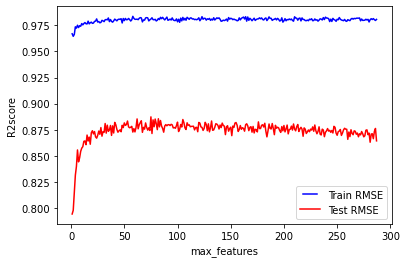

In [45]:
line1, = plt.plot(max_features, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_features, test_results, 'r', label='Test RMSE')
                   
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2score')
plt.xlabel('max_features')
plt.show()

## RandomForest with chosen parameters

In [59]:
params = {'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300,}

In [61]:
reg = RandomForestRegressor(**params)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred),2)
rmse = round(sqrt(mse),2)
r2score = round(r2_score(y_test, y_pred),2)

print("RMSE: " + str(rmse))
print("R2score: " + str(r2score))

RMSE: 28147.73
R2score: 0.88


In [63]:
predictions = reg.predict(test_encoded.drop(columns='Id'))

In [64]:
output = pd.DataFrame({'Id': test_encoded.Id, 'SalePrice': predictions})
output.to_csv('submission.csv', index=False)

## Random Hyperparameter Grid

In [48]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [49]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [50]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

### Evaluation

In [51]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 18657.6654 degrees.
Accuracy = 89.09%.


In [52]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 17892.5826 degrees.
Accuracy = 89.10%.


In [53]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.01%.


### Grid Search with Cross Validation

In [54]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 

param_grid = {
    'bootstrap': [False],
    'max_depth': [None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [0, 1, 2],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model

rf = RandomForestRegressor()# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [55]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_
    
    
best_grid = grid_search.best_estimator_

grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\magda\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.84071165 0.83823353
 0.84600319 0.84307595 0.83883468 0.84377244 0.84169129 0.84341866
        nan        nan        nan        nan 0.8311696  0.8321544
 0.83319402 0.83682084 0.83463607 0.83350205 0.83305531 0.83412353]
  warnings.warn(


Model Performance
Average Error: 17560.3159 degrees.
Accuracy = 89.24%.
Improvement of 0.17%.


In [56]:
grid_search.best_params_  

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}